# Homework 8
This code generates a time series visualisation of the number of citibike trip per day by average temperature of that day for October, 2015. 

### Data 

+ Temperature data - http://www.accuweather.com/en/us/new-york-ny/10007/november-weather/349727?monyr=11/1/2015&view=table
+ Citibike data for Oct 2015 - https://www.citibikenyc.com/system-data

In [83]:
import numpy as np
import pandas as pd
import pylab as pl
import os
import re
import datetime

%pylab inline

pl.style.use('bmh')

Populating the interactive namespace from numpy and matplotlib


In [2]:
citibike_oct = pd.read_csv("../../datasets/201510-citibike-tripdata.csv")
temp_oct = pd.read_csv("../../datasets/Oct_2015_NYC_Temperature.csv")

In [3]:
temp_oct['High'] = temp_oct['High'].astype(int64)
temp_oct['Low'] = temp_oct['Low'].astype(int64)


In [8]:
citibike_oct['starttime'] = pd.to_datetime(citibike_oct['starttime'])
citibike_oct['date'] = pd.DatetimeIndex(citibike_oct['starttime']).normalize()


In [36]:
daily_rides = citibike_oct.groupby('date').agg('count')


465
9444


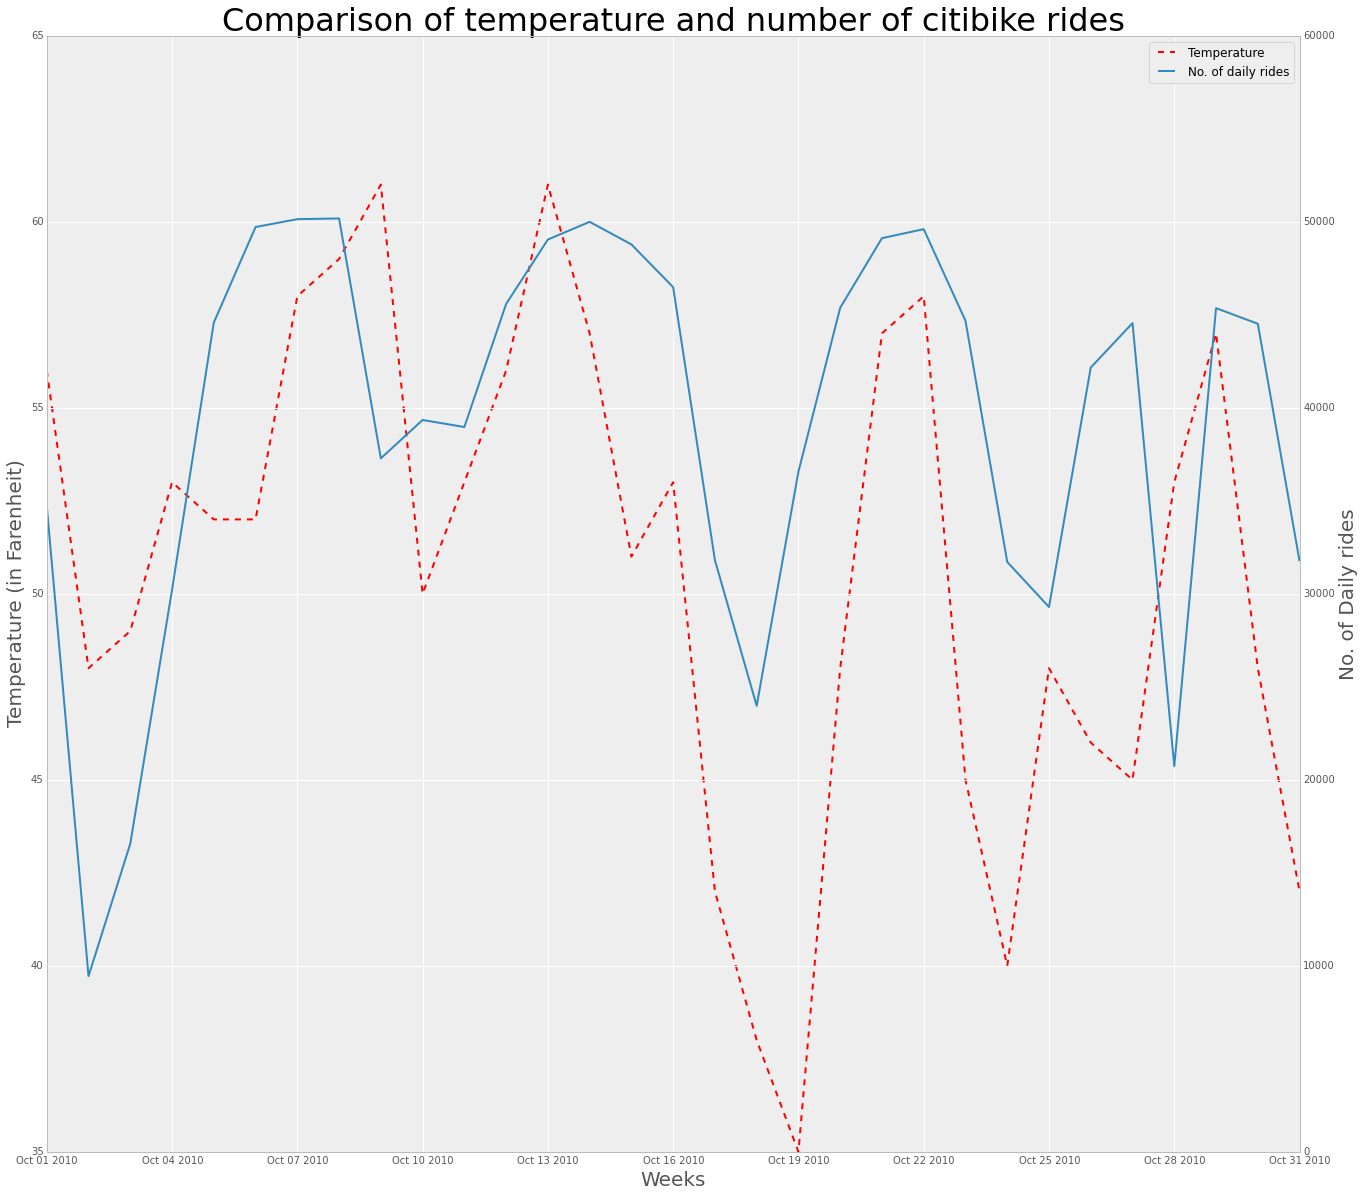

In [88]:
fig, ax1 = pl.subplots(figsize = (20,20))
days = pd.date_range('10/01/2010', periods = 31, freq = 'D')

p1 = ax1.plot(days, temp_oct['Low'], '--', label = "Temperature", color = 'red')
ax1.set_title('Comparison of temperature and number of citibike rides', fontsize = 32)
#ax1.ylim([0,65])
ax1.set_xlabel('Weeks', fontsize = 20);
ax1.set_ylabel('Temperature (in Farenheit)', fontsize = 20);


ax2 = ax1.twinx()
p2 = ax2.plot(days, daily_rides['gender'], label = "No. of daily rides")
ax2.set_ylabel('No. of Daily rides', fontsize = 20);

ps = p1 + p2
labs = [l.get_label() for l in ps]
pl.legend(ps, labs)

fig.savefig('HW8.png')